In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display, Math
from scipy.special import gamma

In [21]:
class GIUH:
    def __init__(self, Qmax, tc, m_Rb, m_Ra, m_Rl, L, t, GIUH_step):
        #self.Q = Q
        self.Qmax = Qmax
        self.tc = tc
        self.m_Rb = m_Rb
        self.m_Ra = m_Rb
        self.m_Rl = m_Rl
        self.L = L
        self.t = t
        self.GIUH_step = GIUH_step
        self.comp_u = []
        self.GIUH_list = []  
        
    def GIUH_v(self):
        self.v = 0.44 * ((giuh.Ra / giuh.Rb ) ** 0.55) * ((giuh.L/1000)  ** (-0.38)) * (giuh.L/1000) / self.tc
        
    def GIUH_vars(self):
        self.a = 3.29 * ((self.Rb / self.Ra) ** 0.78) * (self.Rl ** 0.07)
        self.k = 0.7 * ((self.Ra / (self.Rb * self.Rl)) ** 0.48) * L / self.v
        return 
    
    def GIUH_Rs(self):
        self.Rb = 1 / (10 ** m_Rb)
        self.Ra = 10 ** m_Ra
        self.Rl = 10 ** m_Rl
        return 
    
    def GIUH_U(self):
        self.u = ((self.time / self.k) ** (self.a - 1)) * np.exp(-self.time / self.k) / (self.k * gamma(self.a))
        return 

    def GIUH_qp(self):
        self.qp = (1.31 / (self.L / 1000)) * (self.Rl ** 0.43) * self.v
        return 

    def GIUH_tp(self):
        self.tp = 0.44 * ((self.Ra / self.Rb ) ** 0.55) * ((self.L / 1000)  ** (-0.38)) * (self.L / 1000) / self.v
        return 
    
    def GIUH_loop(self):
        for i in range(len(t)):
            self.time = t[i]
            self.GIUH_U()
            self.comp_u.append(self.u)
            
    def GIUH_plot(self):
        figure(figsize=(20, 10), dpi=300)
        plt.plot(self.t, self.comp_u, linewidth=5.0)
        plt.xlabel("Time(s)", size = 30)
        plt.ylabel("GIUH", size = 30)
        plt.xticks(size = 20)
        plt.yticks(size = 20)
        plt.grid(True)
        plt.show()
        
    def altElement(self):
            return self.comp_u[::self.GIUH_step] 
        
    def GIUH_ordinates(self):
        self.GIUH_list = self.altElement()
        for i in range(len(self.GIUH_list)):
            self.GIUH_list[i] = self.GIUH_list[i] * self.GIUH_step
        self.GIUH_list.pop(0)
        print("\n   Length of the GIUH ordinates: {:9.1f}".format(len(self.GIUH_list)))
        self.res = (1 - np.sum(self.GIUH_list)) / len(self.GIUH_list)
        for i in range(len(self.GIUH_list)):
            self.GIUH_list[i] = self.GIUH_list[i] + self.res 
        print("\n   Sum of the GIUH ordinates: {:9.10f}".format(np.sum(self.GIUH_list)))

In [22]:
# Q =
Qmax = 207 * 0.028316846592 # 6/17/2000 #63.41 * 0.028316846592      # m^3/s
tc = 73 / 60       
m_Ra = 0.716 #0.526
m_Rb = -0.664#-0.716
m_Rl = 0.463#0.134
L = 8141 #833                            # m
t = [i for i in range(30000)]            # s
GIUH_step = 200

giuh = GIUH(Qmax, tc, m_Rb, m_Ra, m_Rl, L, t, GIUH_step)
   # m/s

In [23]:
giuh.GIUH_Rs()
giuh.GIUH_v()
giuh.GIUH_vars()
giuh.GIUH_qp()
giuh.GIUH_tp()
giuh.GIUH_loop()

In [24]:
print("   Qmax of the GIUH: {:9.10f}".format(giuh.Qmax) + " m^3/s")
print("   Ra of the GIUH: {:9.10f}".format(giuh.Ra))
print("   Rb of the GIUH: {:8.4f}".format(giuh.Rb))
print("   Rl of the GIUH: {:9.10f}".format(giuh.Rl))
print("   v of the GIUH: {:8.4f}".format(giuh.v) + " m/s")
print("   L of the GIUH: {:8.4f}".format(giuh.L) + " m/s")
print("   k of the GIUH: {:9.10f}".format(giuh.k))
print("   a of the GIUH: {:8.4f}".format(giuh.a))
print("   peak discharge of the GIUH: {:9.10f}".format(giuh.qp))
print("   The time to peak of the GIUH: {:8.4f}".format(giuh.tp))

   Qmax of the GIUH: 5.8615872445 m^3/s
   Ra of the GIUH: 5.1999599653
   Rb of the GIUH:   4.6132
   Rl of the GIUH: 2.9040226545
   v of the GIUH:   1.4174 m/s
   L of the GIUH: 8141.0000 m/s
   k of the GIUH: 2552.6690928493
   a of the GIUH:   3.2288
   peak discharge of the GIUH: 0.3607321212
   The time to peak of the GIUH:   1.2167


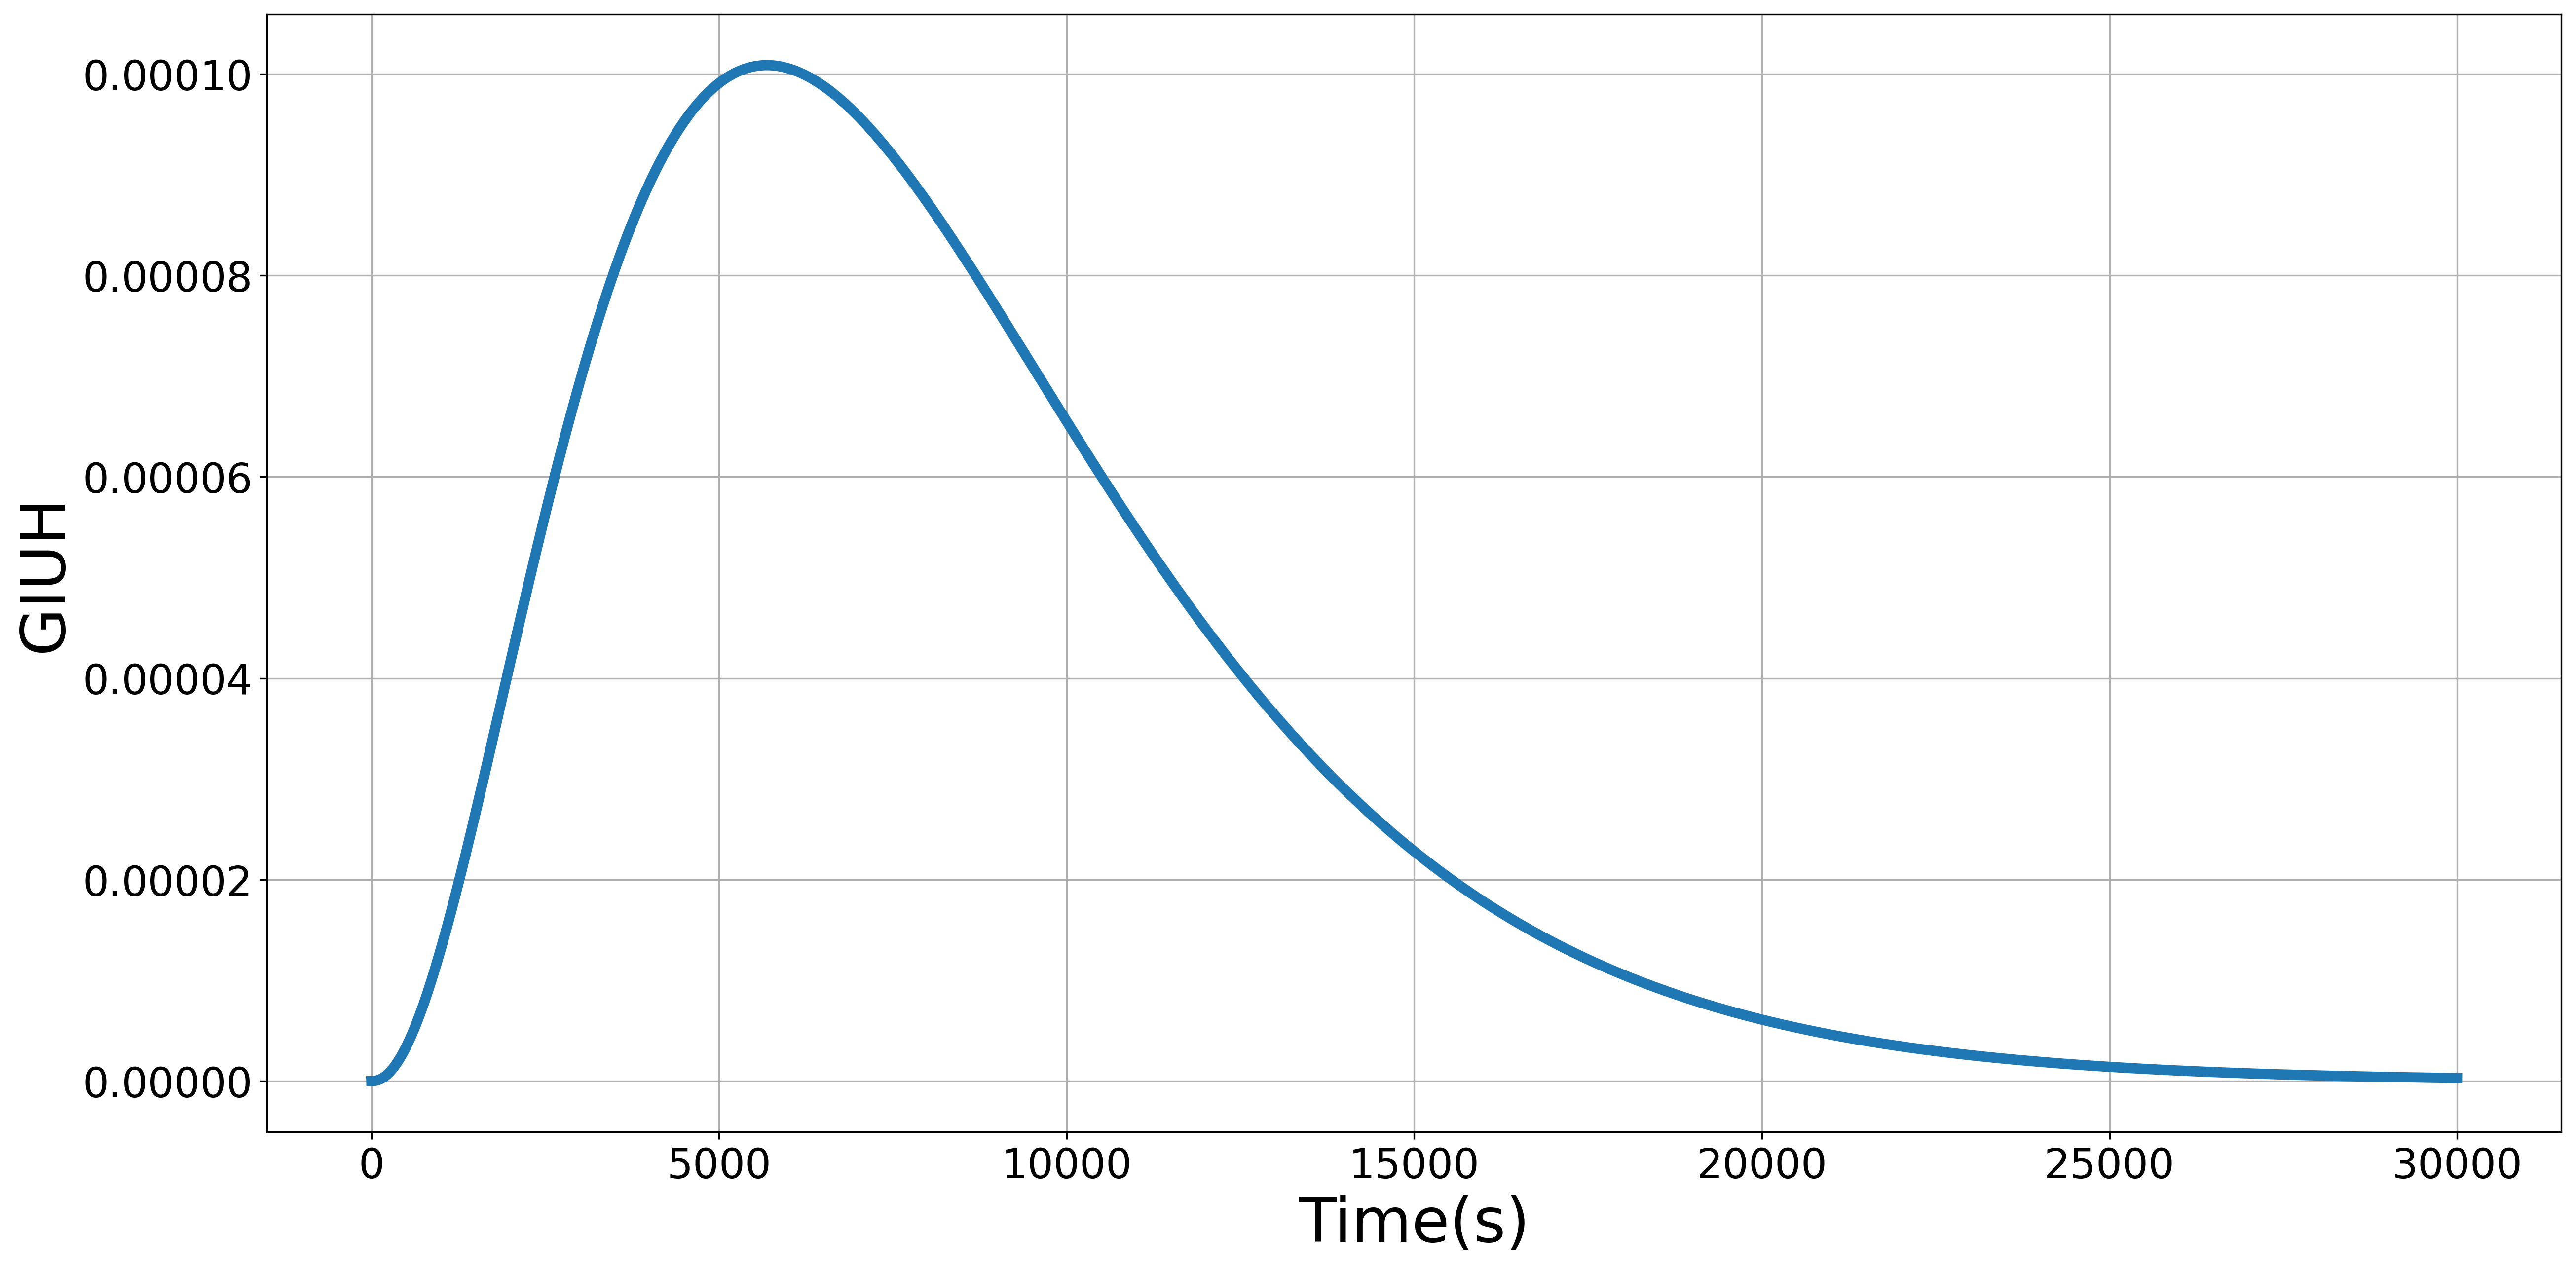

In [25]:
giuh.GIUH_plot()

In [26]:
giuh.GIUH_ordinates()


   Length of the GIUH ordinates:     149.0

   Sum of the GIUH ordinates: 1.0000000000


In [27]:
giuh.GIUH_list

[0.00010593332576406063,
 0.0004377518456757851,
 0.0009910318300409698,
 0.0017350690379135609,
 0.0026347316971041274,
 0.003655070610276801,
 0.004763265438234295,
 0.005929490500485192,
 0.007127252898552923,
 0.008333448252685147,
 0.009528259177613702,
 0.010694966264060204,
 0.011819712793943,
 0.012891248462689575,
 0.013900667911140328,
 0.014841153989835524,
 0.015707731905175448,
 0.01649703791717622,
 0.017207104603093524,
 0.017837163586938834,
 0.018387465884548263,
 0.018859119512761407,
 0.01925394368332393,
 0.019574338695659835,
 0.019823170521891004,
 0.020003669017256843,
 0.020119338671483997,
 0.02017388082877925,
 0.020171126336615806,
 0.020114977629537924,
 0.020009359308840204,
 0.01985817633854844,
 0.019665279039989225,
 0.019434434129472808,
 0.019169301104862514,
 0.01887341334610861,
 0.018550163351538595,
 0.01820279158540169,
 0.01783437846261881,
 0.017447839043773707,
 0.017045920057075302,
 0.016631198904371536,
 0.016206084345398445,
 0.015772818588